# Análise de resultados do IMI - Feedback da sessão de julgamento

Este notebook procura fazer a análise das respostas da pesquisa de feedback da sessão de julgamento do TST. Para isso, as seguintes ações serão realizadas:

- Recuperação das perguntas formuladas, para mapeamento das questões conforme o id do IMI
- Identificação de quais perguntas são reversas (Tp = R)
- Mapeamento das respostas para cada pergunta
- Cálculo do valor da resposta das perguntas reversas seguindo a fórmula: (Valor máximo Escala de Likert + 1 ) - Valor da resposta
- Cálculo da confiabilidade com o Alpha de Cronbach
- Cálculo da Média e Desvio Padrão
- Similaridade: Correlação de Pearson

## Importação das bibliotecas

Utilizaremos as seguintes bibliotecas:
- pandas: Permite criar DataFrames a partir dos arquivos Excel
- numpy: Biblioteca estatítica do Python
- pingouin: Lib que permite o cálculo do Alpha de Cronbach
- matplotlib e seaborn: Bibliotecas que permitem plotar gráficos

In [40]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns


## Recuperação das perguntas

Abriremos o arquivo `imi-perguntas.xlsx` para criar os DataFrames:

In [41]:
perguntasImi = pd.read_excel('arquivos/imi-perguntas.xlsx', sheet_name='IMI Grupo 1')
display(perguntasImi)

,Id,Sc,Tp,Pergunta (Português),Perguntas adaptadas,Perguntas adaptadas com ajustes para envio,Posição de envio,Question (English),IMI var,Unnamed: 9,Unnamed: 10
0,1,I,NaN,Tive muito prazer em realizar esta atividade.,Tive prazer em ajudar o tribunal com a pesquis...,Foi prazeroso ajudar o TST com a pesquisa de f...,5.0,1 - I enjoyed doing this activity very much,NaN,1- Discordo fortemente 5- Concordo fortemente,Tenho prazer em realizar as atividades
1,2,I,NaN,Foi divertido realizar esta atividade.,NaN,NaN,NaN,2 - This activity was fun to do.,NaN,NaN,NaN
2,3,I,R,Achei esta atividade monótona.,Achei o processo de responta à pesquisa de fee...,Achei monótono responder a pesquisa de feedbac...,9.0,3 - I thought this was a boring activity. (R),NaN,NaN,NaN
3,4,I,R,Não prestei qualquer atenção nesta atividade.,NaN,NaN,NaN,4 - This activity did not hold my attention at...,NaN,NaN,NaN
4,5,I,NaN,Eu descreveria esta atividade como muito inter...,Eu achei que responder à pesquisa de feedback ...,Eu achei que responder à pesquisa de feedback ...,1.0,5 - I would describe this activity as very int...,NaN,NaN,NaN
5,8,P,NaN,Sou razoavelmente competente nesta atividade.,Sou razoavelmente competente para sugerir melh...,Sou razoavelmente competente para sugerir melh...,12.0,8 - I think I am pretty good at this activity.,NaN,NaN,NaN
6,9,P,NaN,"Creio ter me saído muito bem nesta atividade, ...",NaN,NaN,NaN,9 - I think I did pretty well at this activity...,NaN,NaN,NaN
7,11,P,NaN,Estou satisfeito com o meu desempenho nesta at...,NaN,NaN,NaN,11 - I am satisfied with my performance at thi...,NaN,NaN,NaN
8,13,P,R,Esta foi uma atividade que eu não poderia faze...,Sugerir melhorias com pesquisas de feedback nã...,Sugerir melhorias com pesquisas de feedback pa...,11.0,13 - This was an activity that I couldn’t do v...,NaN,NaN,NaN
9,14,E,NaN,Fiz um esforço considerável nesta atividade.,Fiz um esforço considerável em responder pesqu...,Fiz um esforço considerável em responder a pes...,6.0,14 - I put a lot of effort into this.,NaN,NaN,NaN


Recuperaremos apenas as colunas de interesse: ID, Sc, Tp, Perguntas adaptadas com ajustes para envio

In [42]:
dfPerguntas = pd.DataFrame().assign(id=perguntasImi['Id'], sc=perguntasImi['Sc'], tp=perguntasImi['Tp'],perguntaAdaptada=perguntasImi['Perguntas adaptadas com ajustes para envio'], perguntaOriginal=perguntasImi['Pergunta (Português)'])
display(dfPerguntas)

,id,sc,tp,perguntaAdaptada,perguntaOriginal
0,1,I,NaN,Foi prazeroso ajudar o TST com a pesquisa de f...,Tive muito prazer em realizar esta atividade.
1,2,I,NaN,NaN,Foi divertido realizar esta atividade.
2,3,I,R,Achei monótono responder a pesquisa de feedbac...,Achei esta atividade monótona.
3,4,I,R,NaN,Não prestei qualquer atenção nesta atividade.
4,5,I,NaN,Eu achei que responder à pesquisa de feedback ...,Eu descreveria esta atividade como muito inter...
5,8,P,NaN,Sou razoavelmente competente para sugerir melh...,Sou razoavelmente competente nesta atividade.
6,9,P,NaN,NaN,"Creio ter me saído muito bem nesta atividade, ..."
7,11,P,NaN,NaN,Estou satisfeito com o meu desempenho nesta at...
8,13,P,R,Sugerir melhorias com pesquisas de feedback pa...,Esta foi uma atividade que eu não poderia faze...
9,14,E,NaN,Fiz um esforço considerável em responder a pes...,Fiz um esforço considerável nesta atividade.


Agora, filtraremos o dataset para trazer apenas os registros que possuem perguntas adaptadas:

In [43]:
dfPerguntasFiltradas = dfPerguntas.query('perguntaAdaptada.notnull()')
display(dfPerguntasFiltradas)

,id,sc,tp,perguntaAdaptada,perguntaOriginal
0,1,I,NaN,Foi prazeroso ajudar o TST com a pesquisa de f...,Tive muito prazer em realizar esta atividade.
2,3,I,R,Achei monótono responder a pesquisa de feedbac...,Achei esta atividade monótona.
4,5,I,NaN,Eu achei que responder à pesquisa de feedback ...,Eu descreveria esta atividade como muito inter...
5,8,P,NaN,Sou razoavelmente competente para sugerir melh...,Sou razoavelmente competente nesta atividade.
8,13,P,R,Sugerir melhorias com pesquisas de feedback pa...,Esta foi uma atividade que eu não poderia faze...
9,14,E,NaN,Fiz um esforço considerável em responder a pes...,Fiz um esforço considerável nesta atividade.
15,21,T,R,Fiquei bem à vontade enquanto respondia a pesq...,Fiquei bem à vontade enquanto fazia esta ativi...
17,23,T,NaN,Eu me senti pressionado(a) enquanto respondia ...,Eu me senti pressionado(a) enquanto fazia esta...
23,29,C,NaN,Respondi a pesquisa de feedback para o TST por...,Realizei esta atividade porque queria.
24,30,C,R,Respondi a pesquisa de feedback para o TST por...,Realizei esta atividade porque tinha que reali...


## Recuperação das respostas

Faremos agora o carregamento das respostas enviadas do formulário:

In [44]:
dfRespostas = pd.read_excel('arquivos/respostas-questionario.xlsx')
display(dfRespostas)

,Carimbo de data/hora,Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.,Acho que responder a pesquisa de feedback é útil para melhorar a atividade jurisdicional do TST.,Senti que posso confiar nas pesquisa de feedback sobre sessões de julgamento do TST.,Eu me senti pressionado(a) enquanto respondia a pesquisa de feedback para o TST.,Foi prazeroso ajudar o TST com a pesquisa de feedback da sessão.,Fiz um esforço considerável em responder a pesquisa de feedback para avaliar as sessões de julgamento do TST.,Creio que responder a pesquisa de feedback para o TST pode me ajudar a ter uma melhor participação em sessões de julgamento.,Respondi a pesquisa de feedback para o TST porque eu tinha que fazer isso.,Achei monótono responder a pesquisa de feedback para o TST.,Gostaria de interagir mais frequentemente com o TST.,Sugerir melhorias com pesquisas de feedback para o TST não é algo que eu poderia fazer muito bem.,Sou razoavelmente competente para sugerir melhorias com a pesquisa de feedback para o TST.,Não sinto que posso confiar nesta pesquisa de feedback sobre sessões de julgamento do TST.,Fiquei bem à vontade enquanto respondia a pesquisa de feedback para avaliar as sessões de julgamento do TST.,Respondi a pesquisa de feedback para o TST porque eu queria.
0,2022-12-08 11:09:37.891,4,4,4,2,3,4,4,4,3,2,3,4,4,4,4
1,2022-12-08 11:17:20.247,5,5,5,1,5,3,5,1,1,5,1,5,1,5,5
2,2022-12-08 11:24:41.264,3,4,4,1,4,3,4,1,1,3,3,1,3,3,3
3,2022-12-08 11:38:58.288,5,5,5,1,3,1,1,1,1,1,3,3,1,5,5
4,2022-12-08 11:49:07.551,3,5,3,5,5,2,3,2,1,5,1,4,3,5,5
5,2022-12-08 13:20:46.608,5,5,5,1,5,2,4,4,2,5,3,3,2,5,5
6,2022-12-08 14:11:07.361,5,5,5,1,5,1,5,1,1,5,1,3,1,5,5
7,2022-12-08 15:08:20.335,3,1,1,4,3,2,1,4,3,4,1,4,5,2,4
8,2022-12-08 15:12:21.118,4,5,4,1,4,1,3,1,3,4,1,5,4,4,5
9,2022-12-08 19:23:04.912,5,5,5,1,5,4,2,1,1,5,1,5,1,5,5


In [45]:
dfRespostas = dfRespostas.drop(columns=['Carimbo de data/hora'])
display(dfRespostas)

,Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.,Acho que responder a pesquisa de feedback é útil para melhorar a atividade jurisdicional do TST.,Senti que posso confiar nas pesquisa de feedback sobre sessões de julgamento do TST.,Eu me senti pressionado(a) enquanto respondia a pesquisa de feedback para o TST.,Foi prazeroso ajudar o TST com a pesquisa de feedback da sessão.,Fiz um esforço considerável em responder a pesquisa de feedback para avaliar as sessões de julgamento do TST.,Creio que responder a pesquisa de feedback para o TST pode me ajudar a ter uma melhor participação em sessões de julgamento.,Respondi a pesquisa de feedback para o TST porque eu tinha que fazer isso.,Achei monótono responder a pesquisa de feedback para o TST.,Gostaria de interagir mais frequentemente com o TST.,Sugerir melhorias com pesquisas de feedback para o TST não é algo que eu poderia fazer muito bem.,Sou razoavelmente competente para sugerir melhorias com a pesquisa de feedback para o TST.,Não sinto que posso confiar nesta pesquisa de feedback sobre sessões de julgamento do TST.,Fiquei bem à vontade enquanto respondia a pesquisa de feedback para avaliar as sessões de julgamento do TST.,Respondi a pesquisa de feedback para o TST porque eu queria.
0,4,4,4,2,3,4,4,4,3,2,3,4,4,4,4
1,5,5,5,1,5,3,5,1,1,5,1,5,1,5,5
2,3,4,4,1,4,3,4,1,1,3,3,1,3,3,3
3,5,5,5,1,3,1,1,1,1,1,3,3,1,5,5
4,3,5,3,5,5,2,3,2,1,5,1,4,3,5,5
5,5,5,5,1,5,2,4,4,2,5,3,3,2,5,5
6,5,5,5,1,5,1,5,1,1,5,1,3,1,5,5
7,3,1,1,4,3,2,1,4,3,4,1,4,5,2,4
8,4,5,4,1,4,1,3,1,3,4,1,5,4,4,5
9,5,5,5,1,5,4,2,1,1,5,1,5,1,5,5


Definição de funções que ajudarão a ajustar o DataFrame:

In [46]:
def getIdFromColumnName(valor:str, nomeDaColuna: str, df: pd.DataFrame)->int :
    row = df.loc[df[nomeDaColuna]== valor]
    return row.iloc[0]['id']

print(getIdFromColumnName('Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.', 'perguntaAdaptada', dfPerguntasFiltradas))


5


In [47]:
def getTpById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['tp']

def getPerguntaById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['perguntaAdaptada']


print(getTpById('3',  dfPerguntasFiltradas))

R


Vamos modificar o nome das colunas para que correspondam ao ID do questionário IMI:

In [48]:
dfRespostasComId = dfRespostas.copy()
columnsDictionary = {}
for coluna in dfRespostas.columns:
    idColuna = str(getIdFromColumnName(coluna, 'perguntaAdaptada', dfPerguntasFiltradas))
    columnsDictionary[coluna] = idColuna

print(columnsDictionary)
dfRespostasComId.rename(columns = columnsDictionary, inplace=True)
display(dfRespostasComId)

{'Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.': '5', 'Acho que responder a pesquisa de feedback é útil para melhorar a atividade jurisdicional do TST.': '32', 'Senti que posso confiar nas pesquisa de feedback sobre sessões de julgamento do TST.': '40', 'Eu me senti pressionado(a) enquanto respondia a pesquisa de feedback para o TST.': '23', 'Foi prazeroso ajudar o TST com a pesquisa de feedback da sessão.': '1', 'Fiz um esforço considerável em responder a pesquisa de feedback para avaliar as sessões de julgamento do TST.': '14', 'Creio que responder a pesquisa de feedback para o TST pode me ajudar a ter uma melhor participação em sessões de julgamento.': '35', 'Respondi a pesquisa de feedback para o TST porque eu tinha que fazer isso.': '30', 'Achei monótono responder a pesquisa de feedback para o TST.': '3', 'Gostaria de interagir mais frequentemente com o TST.': '41', 'Sugerir melhorias com pesquisas de feedback para o TST não é algo 

,5,32,40,23,1,14,35,30,3,41,13,8,43,21,29
0,4,4,4,2,3,4,4,4,3,2,3,4,4,4,4
1,5,5,5,1,5,3,5,1,1,5,1,5,1,5,5
2,3,4,4,1,4,3,4,1,1,3,3,1,3,3,3
3,5,5,5,1,3,1,1,1,1,1,3,3,1,5,5
4,3,5,3,5,5,2,3,2,1,5,1,4,3,5,5
5,5,5,5,1,5,2,4,4,2,5,3,3,2,5,5
6,5,5,5,1,5,1,5,1,1,5,1,3,1,5,5
7,3,1,1,4,3,2,1,4,3,4,1,4,5,2,4
8,4,5,4,1,4,1,3,1,3,4,1,5,4,4,5
9,5,5,5,1,5,4,2,1,1,5,1,5,1,5,5


## Ajuste das perguntas reversas

Agora faremos os ajustes para as respostas que tem o Tp = 'R', o que indica que o valor deverá ser modificado para refletir a resposta ajustada. O primeiro passo será criar uma coluna com o valor da escala de Linkert utilizada (no nosso caso, 5) acrescido de 1, para que possamos subtrair essa coluna do nosso DataFrame:

In [49]:
# Criando uma coluna com valores 6 para permitir a subtração da coluna inteira
numeroRegistros =  dfRespostas.shape[0]
s = pd.Series(6)
listaComNumerosAjuste = s.repeat(numeroRegistros)
listaComNumerosAjuste = listaComNumerosAjuste.reset_index(drop=True)
print(listaComNumerosAjuste)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
dtype: int64


Após isso, inspecionaremos as colunas para identificar aquelas que devem ser revertidas, ou seja, que contenham o Tp = R na planilha de perguntas do IMI

In [50]:

dfRespostasAjustadas = dfRespostasComId.copy()
for col in dfRespostasAjustadas.columns:
    if (col.isdigit() and getTpById(col, dfPerguntasFiltradas) == 'R'):
        print('Coluna '+ col+ ' tem o Tp = R')
        dfRespostasAjustadas[col] = listaComNumerosAjuste - dfRespostasAjustadas[col]
print('Respostas originais')
print(dfRespostasComId)
print('Respostas ajustadas')
print(dfRespostasAjustadas)

Coluna 30 tem o Tp = R
Coluna 3 tem o Tp = R
Coluna 13 tem o Tp = R
Coluna 43 tem o Tp = R
Coluna 21 tem o Tp = R
Respostas originais
    5  32  40  23  1  14  35  30  3  41  13  8  43  21  29
0   4   4   4   2  3   4   4   4  3   2   3  4   4   4   4
1   5   5   5   1  5   3   5   1  1   5   1  5   1   5   5
2   3   4   4   1  4   3   4   1  1   3   3  1   3   3   3
3   5   5   5   1  3   1   1   1  1   1   3  3   1   5   5
4   3   5   3   5  5   2   3   2  1   5   1  4   3   5   5
5   5   5   5   1  5   2   4   4  2   5   3  3   2   5   5
6   5   5   5   1  5   1   5   1  1   5   1  3   1   5   5
7   3   1   1   4  3   2   1   4  3   4   1  4   5   2   4
8   4   5   4   1  4   1   3   1  3   4   1  5   4   4   5
9   5   5   5   1  5   4   2   1  1   5   1  5   1   5   5
10  5   4   5   1  5   1   5   1  1   4   3  3   1   4   5
11  5   5   5   1  5   1   5   1  1   5   5  5   1   5   5
12  5   5   5   1  5   2   5   1  1   5   1  5   1   5   5
13  4   4   4   1  4   1   4   1  1   4 

## Cálculo do Alpha de Cronbach

Com esses valores, podemos fazer agora o cálculo do Alpha de Cronbach:

In [51]:
pg.cronbach_alpha(data=dfRespostasAjustadas)

(0.7006715267852153, array([0.467, 0.862]))

In [52]:
def dropColumnById(column:str, df:pd.DataFrame)->pd.DataFrame:
    return df.drop(columns=[column])


Como o Alpha deu maior de 0.7, podemos seguir com a nossa análise.

# Análise estatística

Com o resultado ajustado, podemos verificar algumas estatísticas do DataFrame:

In [53]:
dfRespostasAjustadas.describe()

,5,32,40,23,1,14,35,30,3,41,13,8,43,21,29
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,4.350000,4.500000,4.35000,1.500000,4.400000,1.950000,3.850000,4.400000,4.50000,4.250000,4.050000,3.800000,4.050000,1.550000,4.65000
std,0.812728,0.945905,1.03999,1.147079,0.753937,1.099043,1.348488,1.095445,0.82717,1.118034,1.234376,1.056309,1.316894,0.887041,0.67082
min,3.000000,1.000000,1.00000,1.000000,3.000000,1.000000,1.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000
25%,4.000000,4.000000,4.00000,1.000000,4.000000,1.000000,3.000000,4.000000,4.00000,4.000000,3.000000,3.000000,3.000000,1.000000,4.75000
50%,5.000000,5.000000,5.00000,1.000000,5.000000,2.000000,4.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,1.000000,5.00000
75%,5.000000,5.000000,5.00000,1.000000,5.000000,2.250000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,2.000000,5.00000
max,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.00000


## Correlação

Para analisar a correlação entre as respostas, utilizaremos os resultados originais e não os ajustados. Isso se justifica pelo fato da correlação sair com o sinal trocado quando perguntas reversas são utilizadas com respostas ajustadas. Utilizando as respostas originais, o sinal da correlação ficará coerente. 

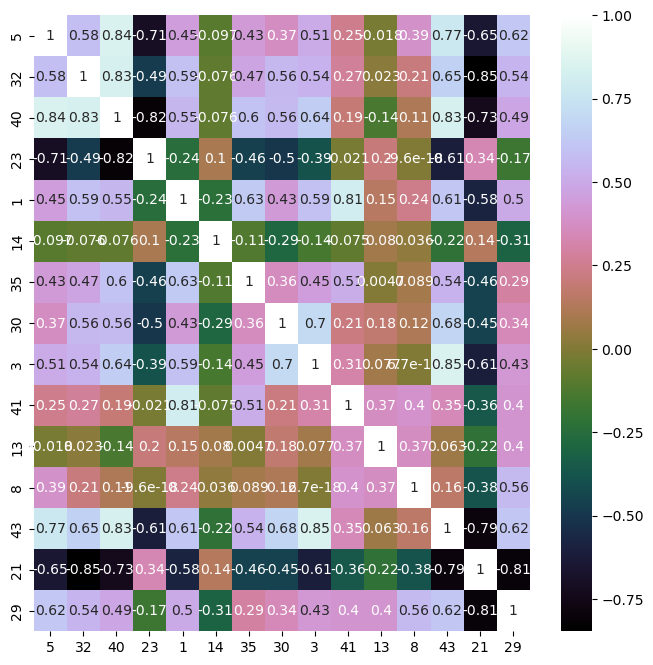

In [54]:
# for col in dfRespostasAjustadas.columns:
# col = '5'
# ax = sns.histplot(data=dfRespostasAjustadas[col])
# dfRespostasOriginaisSemPergunta21 = dropColumnById('21', dfRespostasComId)
correlacoes = dfRespostasAjustadas.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlacoes, annot=True, cmap='cubehelix');

Para averiguar as maiores correlações, podemos analisar o triângulo superior da matriz quadrada, removendo os valores que estão abaixo da diagonal de correlação total (correlação = 1):


In [55]:
correlacoesAbsolutas = correlacoes.abs()
upper_tri = correlacoesAbsolutas.where(np.triu(np.ones(correlacoesAbsolutas.shape),k=1).astype(bool))
display(upper_tri)



,5,32,40,23,1,14,35,30,3,41,13,8,43,21,29
5,NaN,0.581932,0.843746,0.705697,0.446652,0.097223,0.434613,0.366524,0.508885,0.246170,0.018362,3.923649e-01,0.769599,0.646102,0.622665
32,NaN,NaN,0.829280,0.485071,0.590410,0.075941,0.474514,0.558728,0.538138,0.273720,0.022538,2.107015e-01,0.654907,0.846815,0.539145
40,NaN,NaN,NaN,0.816199,0.550422,0.075978,0.602345,0.563620,0.642409,0.192376,0.137346,1.149840e-01,0.832002,0.733123,0.486598
23,NaN,NaN,NaN,NaN,0.243432,0.104371,0.459346,0.502625,0.388290,0.020520,0.204441,9.645001e-18,0.609734,0.336219,0.170996
1,NaN,NaN,NaN,NaN,NaN,0.228665,0.631574,0.433341,0.590765,0.811708,0.147041,2.379155e-01,0.614920,0.582370,0.499512
14,NaN,NaN,NaN,NaN,NaN,NaN,0.111865,0.288526,0.144736,0.074957,0.079531,3.626859e-02,0.216370,0.137666,0.310538
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363420,0.448258,0.514916,0.004743,8.867869e-02,0.537929,0.455403,0.288004
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697015,0.214868,0.179047,1.182600e-01,0.678606,0.454979,0.343788
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313011,0.077321,6.687605e-18,0.845549,0.609715,0.426833
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.371834,4.010909e-01,0.348534,0.358221,0.403509


Com os dados do triângulo superior, vamos verificar quais perguntas tem uma correlação forte ou muito forte (valor acima de 0.7)

In [56]:
s = upper_tri.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
correlacoesFortes = so.loc[lambda x : x >= 0.7]
print(correlacoesFortes)


21  32    0.846815
43  3     0.845549
40  5     0.843746
43  40    0.832002
40  32    0.829280
23  40    0.816199
41  1     0.811708
29  21    0.809315
21  43    0.790731
43  5     0.769599
21  40    0.733123
23  5     0.705697
dtype: float64


Vamos descrever as correlações junto com as perguntas, para verificar se há algum insight:

In [57]:
def getPercentualCorrelacao(linha:str, coluna:str, df: pd.DataFrame)->float:
    return df.loc[linha][coluna]

In [58]:
perguntasCorrelacionadas = []
for perguntas in correlacoesFortes.keys():
    linha = perguntas[0]
    coluna = perguntas[1]
    perguntaLinha = getPerguntaById(linha, dfPerguntasFiltradas)
    perguntaColuna = getPerguntaById(coluna, dfPerguntasFiltradas)
    percentualCorrelacao = getPercentualCorrelacao(linha, coluna, correlacoes)
    perguntasCorrelacionadas.append([linha,perguntaLinha,coluna, perguntaColuna,percentualCorrelacao])
    
dfPerguntasCorrelacionadas = pd.DataFrame(perguntasCorrelacionadas, columns=['ID 1','Pergunta 1','ID 2','Pergunta 2', 'Correlação']).sort_values(by=['ID 1'])
dfPerguntasCorrelacionadas.to_excel('correlacao-respostas-todas.xlsx')
display(dfPerguntasCorrelacionadas)

,ID 1,Pergunta 1,ID 2,Pergunta 2,Correlação
0,21,Fiquei bem à vontade enquanto respondia a pesq...,32,Acho que responder a pesquisa de feedback é út...,-0.846815
8,21,Fiquei bem à vontade enquanto respondia a pesq...,43,Não sinto que posso confiar nesta pesquisa de ...,-0.790731
10,21,Fiquei bem à vontade enquanto respondia a pesq...,40,Senti que posso confiar nas pesquisa de feedba...,-0.733123
5,23,Eu me senti pressionado(a) enquanto respondia ...,40,Senti que posso confiar nas pesquisa de feedba...,-0.816199
11,23,Eu me senti pressionado(a) enquanto respondia ...,5,Eu achei que responder à pesquisa de feedback ...,-0.705697
7,29,Respondi a pesquisa de feedback para o TST por...,21,Fiquei bem à vontade enquanto respondia a pesq...,-0.809315
2,40,Senti que posso confiar nas pesquisa de feedba...,5,Eu achei que responder à pesquisa de feedback ...,0.843746
4,40,Senti que posso confiar nas pesquisa de feedba...,32,Acho que responder a pesquisa de feedback é út...,0.829280
6,41,Gostaria de interagir mais frequentemente com ...,1,Foi prazeroso ajudar o TST com a pesquisa de f...,0.811708
1,43,Não sinto que posso confiar nesta pesquisa de ...,3,Achei monótono responder a pesquisa de feedbac...,0.845549


# Cálculo dos valores das escalas

Feita essa análise inicial, faremos o agrupamento e cálculo das respostas pela escala do IMI

In [59]:
def getPerguntasDaEscala(escala:str, df: pd.DataFrame)->list[str]:
    return df.query("sc==@escala")['id']
    

In [60]:
dictEscalasComPerguntas = {}
escalasUtilizadas = dfPerguntasFiltradas['sc'].unique()
for escala in escalasUtilizadas:
    dictEscalasComPerguntas.update({escala:getPerguntasDaEscala(escala, dfPerguntasFiltradas)})
# for index, row in dfPerguntasFiltradas.iterrows():
print (dictEscalasComPerguntas)

{'I': 0    1
2    3
4    5
Name: id, dtype: int64, 'P': 5     8
8    13
Name: id, dtype: int64, 'E': 9    14
Name: id, dtype: int64, 'T': 15    21
17    23
Name: id, dtype: int64, 'C': 23    29
24    30
Name: id, dtype: int64, 'V': 25    32
27    35
Name: id, dtype: int64, 'R': 31    40
32    41
34    43
Name: id, dtype: int64}


In [61]:
def calculaMediaDeRespostasDaEscala(colunasPerguntas:list, dfRespostas:pd.DataFrame)->float:
    dfRespostasEscala = dfRespostas[colunasPerguntas]
    return dfRespostasEscala.stack().mean()



In [62]:
mediasDasEscalas = []
for escalaPergunta in dictEscalasComPerguntas.items():
    escala = escalaPergunta[0]
    colunasPerguntas = map(str,escalaPergunta[1].tolist())
    mediasDasEscalas.append([escala, calculaMediaDeRespostasDaEscala(colunasPerguntas, dfRespostasAjustadas)])

dfMediaDasEscalas = pd.DataFrame(mediasDasEscalas, columns=['Escala', 'Média'])
print (dfMediaDasEscalas)


  Escala     Média
0      I  4.416667
1      P  3.925000
2      E  1.950000
3      T  1.525000
4      C  4.525000
5      V  4.175000
6      R  4.216667


# Definição do número de técnicas do Octalysis utilizadas para cada escala

Para o nosso projeto, vamos considerar a seguinte tabela de conversão:

| Média da escala | Quantidade de técnicas |
|-----------------|------------------------|
| Maior que 4,5     | 4                      |
| Entre 3,5 e 4,5     | 3                      |
| Entre 2,5 e 3,5     | 2                      |
| Entre 1,5 e 2,5     | 1                      |
| Entre 0 e 1,5   | 0                      |



Dessa forma, temos como resultado final o quantitativo de técnicas abaixo:


In [63]:
def getQuantidadeDeTecnicas(media:float)->int:
    if (media >= 4.5) :
        return 4
    if (media < 4.5 and media >= 3.5):
        return 3
    if (media <3.5 and media >=2.5):
        return 2
    if (media <2.5 and media >=1.5):
        return 1
    return 0

dfResultadoFinalTecnicas = dfMediaDasEscalas.copy()
dfResultadoFinalTecnicas['Quantidade de técnicas'] = dfResultadoFinalTecnicas.apply(lambda row: getQuantidadeDeTecnicas(row['Média']), axis=1)
print(dfResultadoFinalTecnicas)

  Escala     Média  Quantidade de técnicas
0      I  4.416667                       3
1      P  3.925000                       3
2      E  1.950000                       1
3      T  1.525000                       1
4      C  4.525000                       4
5      V  4.175000                       3
6      R  4.216667                       3
